In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('ge_rates_nonadj.csv')

In [3]:
df.columns

Index(['Date', 'Close', 'Volume', 'std', 'upper', 'lower', 'Rates'], dtype='object')

In [4]:
#df = df.drop(['Volume', 'std', 'upper', 'lower'], axis = 1)

In [5]:
df['lag'] = df['Close'].shift()
#df['std'] = df['std'].shift()

In [6]:
df.dropna(inplace=True)

In [7]:
df.head()

,Date,Close,Volume,std,upper,lower,Rates,lag
1,1990-10-29,4.239583,23887200.0,0.011211,4.262006,4.217160,7.17,4.208333
2,1990-10-30,4.395833,27138000.0,0.010366,4.416565,4.375101,7.17,4.239583
3,1990-10-31,4.333333,15692400.0,0.010172,4.353677,4.312989,7.17,4.395833
4,1990-11-01,4.364583,18014400.0,0.009890,4.384362,4.344804,7.06,4.333333
5,1990-11-02,4.416667,20180400.0,0.009598,4.435862,4.397472,7.06,4.364583


In [8]:
df['std_1'] = df['Close'].rolling(5).std().dropna().shift()
df['lag_2'] = df['Close'].shift(60)

In [9]:
df.dropna(inplace=True)

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.set_index('Date', inplace=True)

For GE I am going to make my train test split on the year 2014

In [12]:
train_df = df[:'2014']
test_df = df['2015':]

In [13]:
train_df.tail()

,Close,Volume,std,upper,lower,Rates,lag,std_1,lag_2
Date,,,,,,,,,
2014-12-24,25.830000,17865100.0,0.564560,26.959120,24.700880,0.03,25.879999,0.497514,25.620001
2014-12-26,25.780001,14978500.0,0.517207,26.814415,24.745587,0.03,25.830000,0.295347,25.160000
2014-12-29,25.700001,20858200.0,0.492689,26.685378,24.714624,0.03,25.780001,0.102127,25.120001
2014-12-30,25.570000,22184500.0,0.487743,26.545487,24.594513,0.03,25.700001,0.077136,25.400000
2014-12-31,25.270000,28206500.0,0.479912,26.229824,24.310176,0.03,25.570000,0.121532,25.219999


In [14]:
test_df.tail()

,Close,Volume,std,upper,lower,Rates,lag,std_1,lag_2
Date,,,,,,,,,
2018-09-24,11.74,148589900.0,0.268106,12.276213,11.203787,2.03,12.17,0.265141,13.83
2018-09-25,11.27,133694200.0,0.383368,12.036737,10.503263,2.03,11.74,0.438429,13.61
2018-09-26,11.39,93374600.0,0.446212,12.282424,10.497576,2.03,11.27,0.618587,13.37
2018-09-27,11.53,82196200.0,0.470152,12.470304,10.589696,2.03,11.39,0.506192,13.37
2018-09-28,11.29,76542900.0,0.515216,12.320433,10.259567,2.03,11.53,0.353695,13.43


To see this visually, we can make a line plot of the train and test data

In [15]:
import matplotlib.pyplot as plt

In [16]:
graph_df_train = train_df
maper = {'Close':'Train'}
graph_df_train.rename(maper, axis = 1, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [17]:
graph_df_test = test_df
maper = {'Close':'Test'}
graph_df_test.rename(maper, axis = 1, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


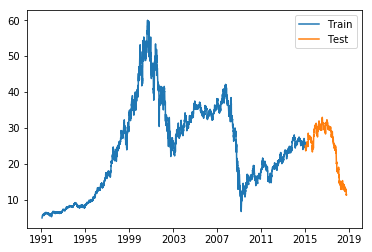

In [18]:
plt.plot(graph_df_train['Train'])
plt.plot(graph_df_test['Test'])
plt.legend();

As you can see, 2014 is a year where the pattern of a downward trend may begin again. Lets build a model to find out. 

In [19]:
df.head()

,Close,Volume,std,upper,lower,Rates,lag,std_1,lag_2
Date,,,,,,,,,
1991-01-24,4.875000,31964400.0,0.013160,4.901321,4.848679,6.22,4.770833,0.045762,4.239583
1991-01-25,4.989583,28312800.0,0.014789,5.019160,4.960006,6.22,4.875000,0.058649,4.395833
1991-01-28,5.052083,24478800.0,0.016771,5.085625,5.018541,6.22,4.989583,0.106891,4.333333
1991-01-29,5.052083,18824400.0,0.018449,5.088981,5.015185,6.22,5.052083,0.141029,4.364583
1991-01-30,5.166667,19764000.0,0.021011,5.208690,5.124644,6.22,5.052083,0.122590,4.416667


In [20]:
train_df = df[:'2014']
test_df = df['2015':]

In [21]:
train_df.tail()

,Close,Volume,std,upper,lower,Rates,lag,std_1,lag_2
Date,,,,,,,,,
2014-12-24,25.830000,17865100.0,0.564560,26.959120,24.700880,0.03,25.879999,0.497514,25.620001
2014-12-26,25.780001,14978500.0,0.517207,26.814415,24.745587,0.03,25.830000,0.295347,25.160000
2014-12-29,25.700001,20858200.0,0.492689,26.685378,24.714624,0.03,25.780001,0.102127,25.120001
2014-12-30,25.570000,22184500.0,0.487743,26.545487,24.594513,0.03,25.700001,0.077136,25.400000
2014-12-31,25.270000,28206500.0,0.479912,26.229824,24.310176,0.03,25.570000,0.121532,25.219999


In [22]:
test_df.head()

,Close,Volume,std,upper,lower,Rates,lag,std_1,lag_2
Date,,,,,,,,,
2015-01-02,25.059999,40920800.0,0.454663,25.969326,24.150672,0.03,25.270000,0.223942,24.809999
2015-01-05,24.600000,42033200.0,0.458973,25.517946,23.682054,0.03,25.059999,0.302870,25.250000
2015-01-06,24.070000,63760000.0,0.497231,25.064461,23.075539,0.03,24.600000,0.436864,24.780001
2015-01-07,24.080000,43642500.0,0.533998,25.147996,23.012004,0.03,24.070000,0.589347,24.270000
2015-01-08,24.370001,43224400.0,0.548181,25.466362,23.273640,0.03,24.080000,0.550118,23.950001


Scale Data

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
X_train = train_df[['Rates', 'lag', 'std_1', 'lag_2']].values
X_test = test_df[['Rates', 'lag', 'std_1', 'lag_2']].values

In [26]:
X_train

array([[ 6.22      ,  4.770833  ,  0.04576226,  4.239583  ],
       [ 6.22      ,  4.875     ,  0.05864878,  4.395833  ],
       [ 6.22      ,  4.989583  ,  0.10689136,  4.333333  ],
       ...,
       [ 0.03      , 25.780001  ,  0.10212691, 25.120001  ],
       [ 0.03      , 25.700001  ,  0.07713589, 25.4       ],
       [ 0.03      , 25.57      ,  0.12153158, 25.219999  ]])

In [27]:
train_df_sc = scaler.fit_transform(X_train)
test_df_sc = scaler.transform(X_test)

In [28]:
print(train_df_sc.shape)
print(test_df_sc.shape)

(6032, 4)
(943, 4)


In [29]:
train_df_sc

array([[1.        , 0.        , 0.01362904, 0.        ],
       [1.        , 0.00188609, 0.01746693, 0.00280217],
       [1.        , 0.00396077, 0.03183466, 0.0016813 ],
       ...,
       [0.00322061, 0.38039987, 0.0304157 , 0.37446668],
       [0.00322061, 0.37895136, 0.02297281, 0.37948814],
       [0.00322061, 0.37659751, 0.03619485, 0.37626003]])

In [30]:
from sklearn.svm import SVR

In [31]:
svr = SVR()

In [32]:
y_train = train_df['Close'].values.reshape(-1,1)

In [33]:
len(X_train)

6032

In [34]:
len(y_train)

6032

In [35]:
svr.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [36]:
y_pred = svr.predict(X_test)

In [37]:
len(y_pred)

943

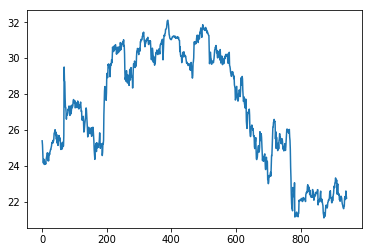

In [38]:

plt.plot(y_pred)

In [39]:
y_test = test_df['Close'].values

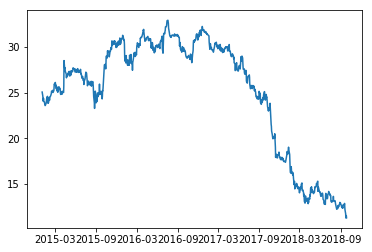

In [40]:
plt.plot(test_df['Close'])

In [41]:
from sklearn.metrics import r2_score

In [42]:
r2_score(y_pred, test_df['Close'])

-0.6207602708943851

In [43]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


In [44]:
from keras import backend as K
K.reset_uids()
K.clear_session()

In [48]:
model = Sequential()
model.add(Dense(10, input_shape=(X_train.shape[1],), activation='tanh', kernel_initializer='lecun_uniform'))
model.add(Dense(10, input_shape=(X_train.shape[1],)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, batch_size=16, validation_data=(X_test, y_test), epochs=100, verbose=1)
#EarlyStopping(monitor='mean_squared_error', min_delta=0.01, patience=.01, verbose=0, mode='auto')

Train on 6032 samples, validate on 943 samples
Epoch 1/100
6032/6032 [==============================] - 1s 239us/step - loss: 364.4946 - val_loss: 33.1416
Epoch 2/100
6032/6032 [==============================] - 1s 121us/step - loss: 52.4709 - val_loss: 33.8634
Epoch 3/100
6032/6032 [==============================] - 1s 121us/step - loss: 20.6337 - val_loss: 15.1924
Epoch 4/100
6032/6032 [==============================] - 1s 137us/step - loss: 12.9791 - val_loss: 11.7832
Epoch 5/100
6032/6032 [==============================] - 1s 121us/step - loss: 10.0868 - val_loss: 8.6068
Epoch 6/100
6032/6032 [==============================] - 1s 156us/step - loss: 7.8800 - val_loss: 8.1891
Epoch 7/100
6032/6032 [==============================] - 1s 147us/step - loss: 5.9513 - val_loss: 7.3876
Epoch 8/100
6032/6032 [==============================] - 1s 128us/step - loss: 4.2324 - val_loss: 5.7363
Epoch 9/100
6032/6032 [==============================] - 1s 148us/step - loss: 3.3753 - val_loss: 3.739

Epoch 78/100
6032/6032 [==============================] - 1s 105us/step - loss: 0.3882 - val_loss: 0.1286
Epoch 79/100
6032/6032 [==============================] - 1s 104us/step - loss: 0.3518 - val_loss: 0.1731
Epoch 80/100
6032/6032 [==============================] - 1s 105us/step - loss: 0.3691 - val_loss: 0.1707
Epoch 81/100
6032/6032 [==============================] - 1s 108us/step - loss: 0.3893 - val_loss: 0.3977
Epoch 82/100
6032/6032 [==============================] - 1s 109us/step - loss: 0.3776 - val_loss: 0.1217
Epoch 83/100
6032/6032 [==============================] - 1s 105us/step - loss: 0.3598 - val_loss: 0.1701
Epoch 84/100
6032/6032 [==============================] - 1s 120us/step - loss: 0.3834 - val_loss: 0.1266
Epoch 85/100
6032/6032 [==============================] - 1s 123us/step - loss: 0.3811 - val_loss: 0.1473
Epoch 86/100
6032/6032 [==============================] - 1s 109us/step - loss: 0.3504 - val_loss: 0.1442
Epoch 87/100
6032/6032 [======================

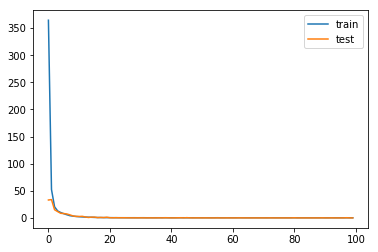

In [49]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

0.9959435209057821

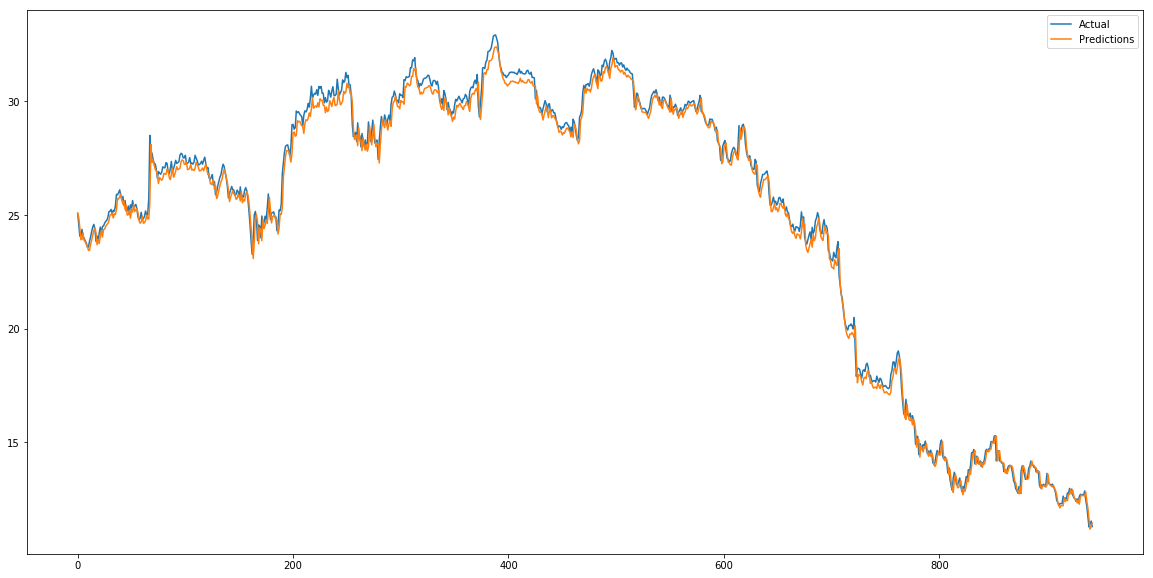

In [50]:
plt.figure(figsize=(20,10))
y_pred = model.predict(X_test)
plt.plot(y_test, label = 'Actual')
plt.plot(y_pred, label = 'Predictions')
plt.legend()
r2_score(y_test, y_pred)

In [51]:
df_pred = pd.DataFrame([y_test, y_pred]).T

In [52]:
df_pred.head()

,0,1
0,25.06,[25.090704]
1,24.6,[24.892162]
2,24.07,[24.440668]
3,24.08,[23.917847]
4,24.37,[23.92722]


In [53]:
df_pred[0] = df_pred[0].astype(float)

In [54]:
df_pred[1] = df_pred[1].astype(float)

In [55]:
maper = {0:'Act', 1:'Preds'}
df_pred.rename(maper, axis=1, inplace=True)

In [56]:
df_pred.set_index(keys=test_df.index, inplace=True)

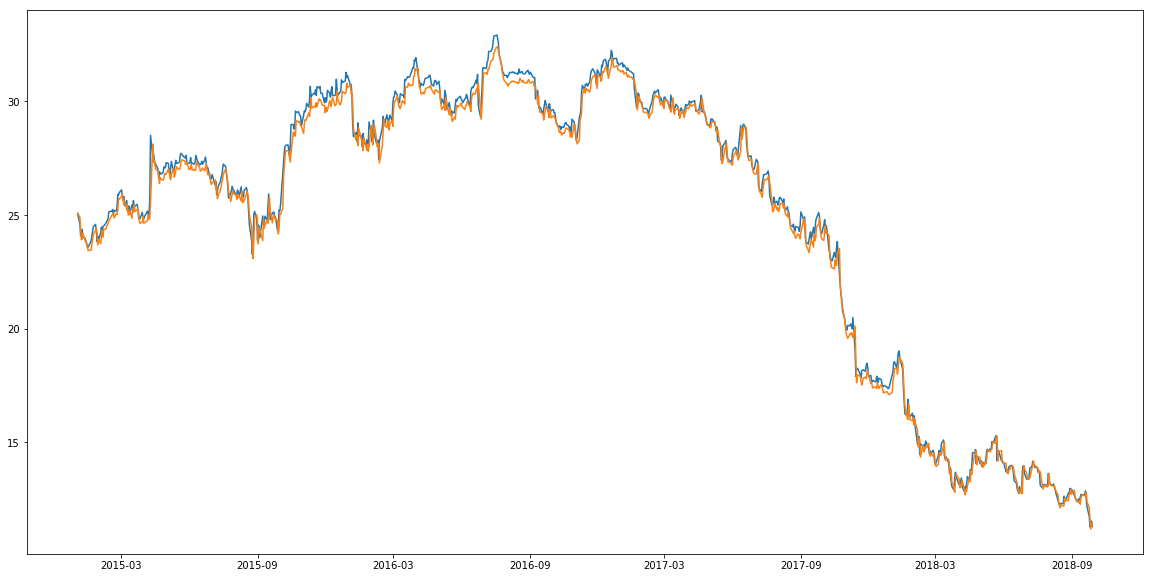

In [57]:
plt.figure(figsize=(20,10))
plt.plot(df_pred);

In [58]:
import numpy as np

In [59]:
df.tail()

,Close,Volume,std,upper,lower,Rates,lag,std_1,lag_2
Date,,,,,,,,,
2018-09-24,11.74,148589900.0,0.268106,12.276213,11.203787,2.03,12.17,0.265141,13.83
2018-09-25,11.27,133694200.0,0.383368,12.036737,10.503263,2.03,11.74,0.438429,13.61
2018-09-26,11.39,93374600.0,0.446212,12.282424,10.497576,2.03,11.27,0.618587,13.37
2018-09-27,11.53,82196200.0,0.470152,12.470304,10.589696,2.03,11.39,0.506192,13.37
2018-09-28,11.29,76542900.0,0.515216,12.320433,10.259567,2.03,11.53,0.353695,13.43


In [60]:
rate = 2
lag = 11
std = 12.482

In [61]:
pred_1 = np.array([[rate, lag, std]])

In [62]:
pred_1.shape

(1, 3)

In [ ]:
#model.predict(pred_1)